In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy import linalg
import time

from sklearn.decomposition import dict_learning_online
from sklearn.decomposition import sparse_encode,dict_learning

from sklearn.decomposition._dict_learning_na import sparse_encode_na,\
                                            update1, dict_learning_na,\
                                            update_dict_na


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.decomposition.bench_dict_learning import *

In [4]:
U = np.random.randn(50, 5)
V = np.random.randn(5, 10)
X = np.dot(U, V)

In [64]:
rng_global = np.random.RandomState(0)
n_samples, n_features = 300, 8
n_components = 12
X = rng_global.randn(n_samples, n_features)

X[-1] = [1,2,3,4,5,6,7,8]

code, dict_, loss = dict_learning_online(X, n_components = n_components, alpha = 1, n_iter = 500)


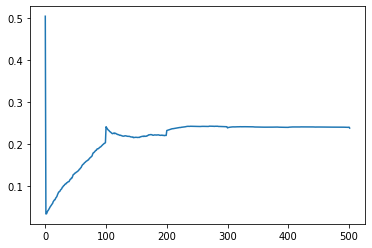

In [65]:
plt.plot(loss)

In [6]:
code, dict_, loss = dict_learning_na(X, n_components = 10, alpha = 1, T = 500)
plt.plot(loss)

[-0.07034241  0.         -0.2412695  -0.05714164 -0.07525773  0.
  0.          0.          0.          0.        ]
0.0
[ 0.          0.          0.          0.          0.          0.37200147
  0.          0.          0.         -0.31553685]
0.0
[ 3.63035194  0.          0.          0.          0.          0.
 -1.1393109   0.20692162  0.          0.        ]
0.0
[ 0.         -0.57516638  0.          0.          0.         -0.28904554
 -0.42268373  0.          0.          0.        ]
0.0
[0.         0.         1.38900621 0.         0.         2.94909758
 0.         0.         0.07553137 0.        ]
0.0057049872236826565
[ 0.         -0.09319287  0.          1.62562696  0.          0.
  0.          0.          0.          0.        ]
0.0
[ 0.          0.05138544  0.         -3.31920823  0.          0.
  4.53227064  0.          0.89290194  0.        ]
0.7972738702630341
[0.         0.         0.         2.49276651 0.         0.
 6.53787083 0.         0.         0.69619006]
0.0
[-2.7634699

KeyboardInterrupt: 

In [32]:
code, dict_, loss = dict_learning(X, n_components = n_components, alpha = 1)

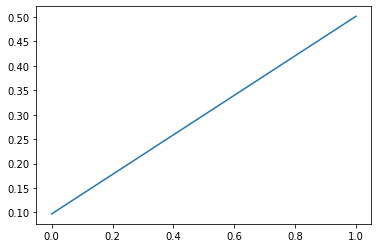

In [33]:
plt.plot(loss)

In [ ]:
for rank in [5, 15]:
    plt.figure()
    bench_loss(n_samples = 70, n_features = 12,
               rank = rank, n_components = 10, alpha = 1)
    plt.title('rank = ' + str(rank))

In [ ]:
for rank in [5, 15]:
    plt.figure()
    bench_loss(n_samples = 70, n_features = 12,
               rank = rank, n_components = 10, alpha = 1)
    plt.title('rank = ' + str(rank))